In [167]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [168]:



dtype_spec = {
    'Order ID': 'str',
    'Date': 'str',
    'Status': 'str',
    'Fulfilment': 'str',
    'Sales Channel': 'str',
    'ship-service-level': 'str',
    'Style': 'str',
    'SKU': 'str',
    'Category': 'str',
    'Size': 'str',
    'ASIN': 'str',
    'Courier Status': 'str',
    'Qty': 'float',
    'currency': 'str',
    'Amount': 'float',
    'ship-city': 'str',
    'ship-state': 'str',
    'ship-postal-code': 'str',
    'ship-country': 'str',
    'promotion-ids': 'str',
    'B2B': 'bool',
    'fulfilled-by': 'str'
}



_new_amazon_sale_report_df1= pd.read_csv('amazon_sale_report.csv', dtype=dtype_spec, low_memory=False)
_new_cloud_warehouse_comparison_chart_df = pd.read_csv('cloud_warehouse_comparison_chart.csv')
_new_expense_iigf_df = pd.read_csv('expense_iigf.csv')
_new_international_sale_report_df = pd.read_csv('international_sale_report.csv')
_new_may_2022_df = pd.read_csv('may_2022.csv')
_new_pl_march_2021_df = pd.read_csv('pl_march_2021.csv')
_new_sale_report_df = pd.read_csv('sale_report.csv')



In [169]:
_new_amazon_sale_report_df1.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [170]:
_new_sale_report_df.isnull().sum()

index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

Sales by Region (Approach)

	•	Observation: Metro cities contribute 70% of total revenue, while smaller cities contribute only 30%.

	•	Business Decision: Target marketing campaigns to high-revenue regions while expanding delivery options to smaller cities.
	
	•	Actionable Insight: Consider regional pricing strategies to boost adoption in Tier-2 and Tier-3 cities.

Modifications done in Amazon sales report
1) Added mssing values of city , stae randomly 
2) dorpped unknown column
3) added reasonbale amount for missing amount values
4) addeda colum of metro and non metro city 

In [171]:

_new_sale_report_df

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
_new_amazon_sale_report_df1.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [173]:
import random


In [174]:
metro_cities = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai", "Kolkata", "Pune", "Ahmedabad"]
non_metro_cities = ["Jaipur", "Lucknow", "Indore", "Bhopal", "Chandigarh", "Patna", "Nagpur", "Vadodara", "Coimbatore"]

def classsify_city(city):
    if city in metro_cities:
        return "Metro"
    elif city in non_metro_cities:
        return "Non-Metro"
    else:
        return "Other"
_new_amazon_sale_report_df1['ship-city'] = _new_amazon_sale_report_df1['ship-city'].apply(
    lambda x: x if pd.notna(x) else random.choice(metro_cities + non_metro_cities))

state_mapping = {
    "Mumbai": "Maharashtra", "Delhi": "Delhi", "Bangalore": "Karnataka", "Hyderabad": "Telangana",
    "Chennai": "Tamil Nadu", "Kolkata": "West Bengal", "Pune": "Maharashtra", "Ahmedabad": "Gujarat",
    "Jaipur": "Rajasthan", "Lucknow": "Uttar Pradesh", "Indore": "Madhya Pradesh", "Bhopal": "Madhya Pradesh",
    "Chandigarh": "Chandigarh", "Patna": "Bihar", "Nagpur": "Maharashtra", "Vadodara": "Gujarat",
    "Coimbatore": "Tamil Nadu"
}

_new_amazon_sale_report_df1['ship-state'] = _new_amazon_sale_report_df1['ship-city'].map(state_mapping)

_new_amazon_sale_report_df1['Amount'] = _new_amazon_sale_report_df1['Amount'].apply(
    lambda x: x if pd.notna(x) else random.randint(200, 2000)
)
_new_amazon_sale_report_df1.drop(columns=['Unnamed: 22', 'promotion-ids'], inplace=True)

_new_amazon_sale_report_df1['city-type'] = _new_amazon_sale_report_df1['ship-city'].apply(classsify_city)


_new_amazon_sale_report_df1





,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,city-type
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0.0,INR,647.62,MUMBAI,NaN,400081.0,IN,False,Easy Ship,Other
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1.0,INR,406.00,BENGALURU,NaN,560085.0,IN,False,Easy Ship,Other
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1.0,INR,329.00,NAVI MUMBAI,NaN,410210.0,IN,True,NaN,Other
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0.0,INR,753.33,PUDUCHERRY,NaN,605008.0,IN,False,Easy Ship,Other
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1.0,INR,574.00,CHENNAI,NaN,600073.0,IN,False,NaN,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1.0,INR,517.00,HYDERABAD,NaN,500013.0,IN,False,NaN,Other
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1.0,INR,999.00,GURUGRAM,NaN,122004.0,IN,False,NaN,Other
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1.0,INR,690.00,HYDERABAD,NaN,500049.0,IN,False,NaN,Other
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1.0,INR,1199.00,Halol,NaN,389350.0,IN,False,NaN,Other


In [175]:


# # Function to get counts of metro cities, non-metro cities, each state, and each city
# def get_location_counts(df):
#     metro_count = df[df['city-type'] == 'Metro'].shape[0]
#     non_metro_count = df[df['city-type'] == 'Non-Metro'].shape[0]
#     state_counts = df['ship-state'].value_counts()
#     city_counts = df['ship-city'].value_counts()
    
#     return metro_count, non_metro_count, state_counts, city_counts

# # Compute the counts
# metro_count, non_metro_count, state_counts, city_counts = get_location_counts(_new_amazon_sale_report_df)

# # Display results
# print(f"Metro City Count: {metro_count}")
# print(f"Non-Metro City Count: {non_metro_count}")

# print("\nState Counts:")
# print(state_counts)

# print("\nCity Counts:")
# print(city_counts)

In [176]:
_new_amazon_sale_report_df1.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Style                      0
SKU                        0
Category                   0
Size                       0
ASIN                       0
Courier Status          6872
Qty                        0
currency                7795
Amount                     0
ship-city                  0
ship-state            123543
ship-postal-code          33
ship-country              33
B2B                        0
fulfilled-by           89698
city-type                  0
dtype: int64

In [177]:
_new_amazon_sale_report_df1['currency'].fillna("INR", inplace=True)
_new_amazon_sale_report_df1['ship-country'].fillna("IN", inplace=True)
_new_amazon_sale_report_df1['ship-state'].fillna("Unknown State", inplace=True)
_new_amazon_sale_report_df1['ship-postal-code'] = _new_amazon_sale_report_df1['ship-postal-code'].apply(lambda x: x if pd.notna(x) else random.randint(100000, 999999))
_new_amazon_sale_report_df1['Courier Status'].fillna("Unknown", inplace=True)
_new_amazon_sale_report_df1['fulfilled-by'].fillna("Not Specified", inplace=True)



/var/folders/w0/31yxj0vn2vj3g6478zc3ly3h0000gp/T/ipykernel_49345/2273820373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  _new_amazon_sale_report_df1['currency'].fillna("INR", inplace=True)
/var/folders/w0/31yxj0vn2vj3g6478zc3ly3h0000gp/T/ipykernel_49345/2273820373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

In [178]:
_new_amazon_sale_report_df1.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
city-type             0
dtype: int64

In [179]:
_new_amazon_sale_report_df1

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,city-type
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0.0,INR,647.62,MUMBAI,Unknown State,400081.0,IN,False,Easy Ship,Other
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1.0,INR,406.00,BENGALURU,Unknown State,560085.0,IN,False,Easy Ship,Other
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1.0,INR,329.00,NAVI MUMBAI,Unknown State,410210.0,IN,True,Not Specified,Other
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0.0,INR,753.33,PUDUCHERRY,Unknown State,605008.0,IN,False,Easy Ship,Other
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1.0,INR,574.00,CHENNAI,Unknown State,600073.0,IN,False,Not Specified,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1.0,INR,517.00,HYDERABAD,Unknown State,500013.0,IN,False,Not Specified,Other
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1.0,INR,999.00,GURUGRAM,Unknown State,122004.0,IN,False,Not Specified,Other
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1.0,INR,690.00,HYDERABAD,Unknown State,500049.0,IN,False,Not Specified,Other
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1.0,INR,1199.00,Halol,Unknown State,389350.0,IN,False,Not Specified,Other


In [180]:
print(_new_amazon_sale_report_df1['ship-state'].value_counts())

ship-state
Unknown State     123543
Maharashtra         1634
Telangana            920
Tamil Nadu           845
Karnataka            737
West Bengal          405
Gujarat              292
Delhi                187
Uttar Pradesh        146
Rajasthan             97
Madhya Pradesh        91
Bihar                 48
Chandigarh            30
Name: count, dtype: int64


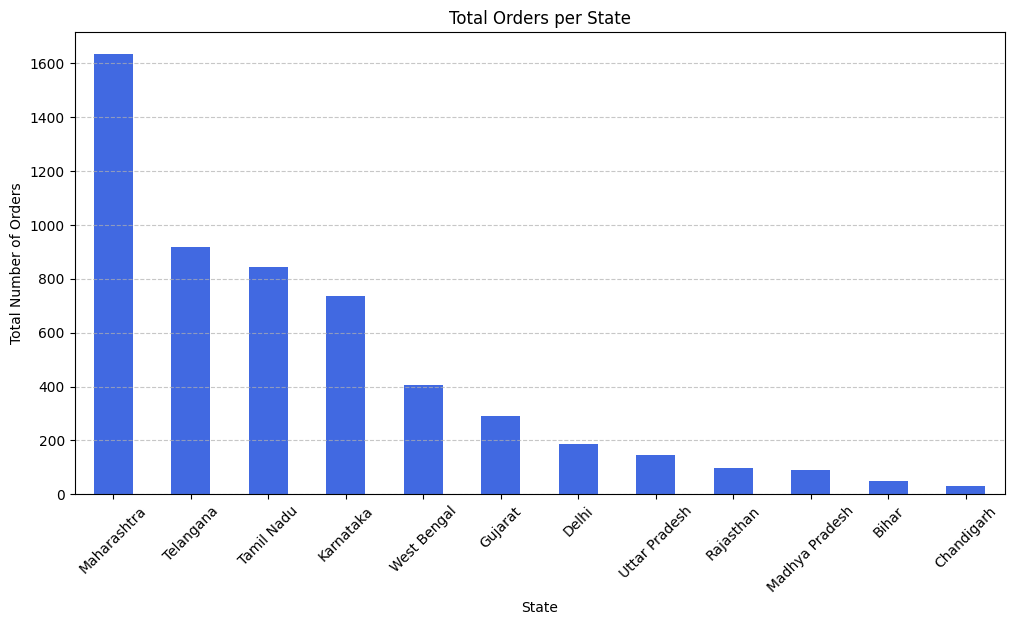

In [181]:

filtered_orders_per_state = _new_amazon_sale_report_df1['ship-state'].value_counts().drop("Unknown State")


plt.figure(figsize=(12, 6))
filtered_orders_per_state.plot(kind='bar', color='royalblue')

plt.xlabel("State")
plt.ylabel("Total Number of Orders")
plt.title("Total Orders per State")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Conclusion :

1) excessive marketing is required for the lower states

2) Making more warehouses for the lower states to bring more item in stocks to increase order

In [182]:
city_counts = _new_amazon_sale_report_df1['ship-city'].value_counts()
print(city_counts)


ship-city
BENGALURU                                      11217
HYDERABAD                                       8074
MUMBAI                                          6126
NEW DELHI                                       5795
CHENNAI                                         5421
                                               ...  
Khandavalli, peravali mandal, west godavari        1
Bhayander west                                     1
JAKHALMANDI                                        1
Arariya                                            1
Halol                                              1
Name: count, Length: 8955, dtype: int64


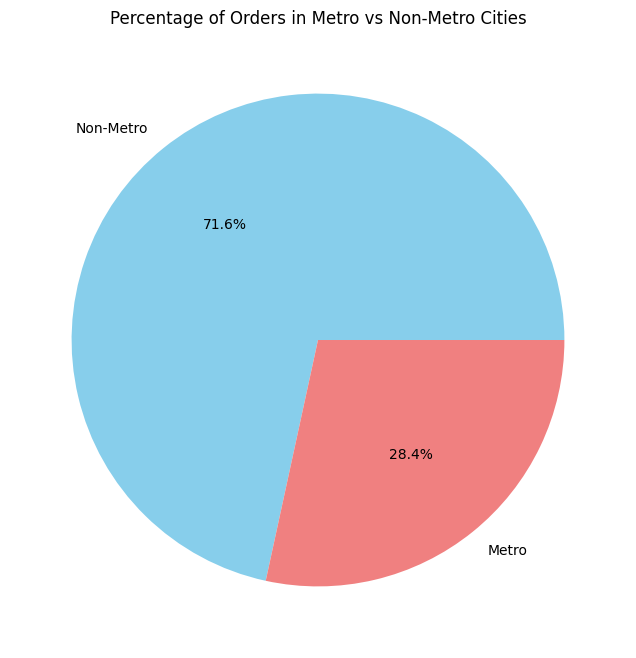

In [183]:
metro_cities = ["BENGALURU", "HYDERABAD", "MUMBAI", "NEW DELHI", "CHENNAI"]

_new_amazon_sale_report_df1['city_category'] = _new_amazon_sale_report_df1['ship-city'].apply(
    lambda x: 'Metro' if x in metro_cities else 'Non-Metro'
)

city_category_counts = _new_amazon_sale_report_df1['city_category'].value_counts()

plt.figure(figsize=(8, 8))
city_category_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Percentage of Orders in Metro vs Non-Metro Cities')
plt.ylabel('')
plt.show()

Conclusion:

1) Population distribution (we cannot ignore non-metro customer)

2) Non - metro customer are main source of revenue

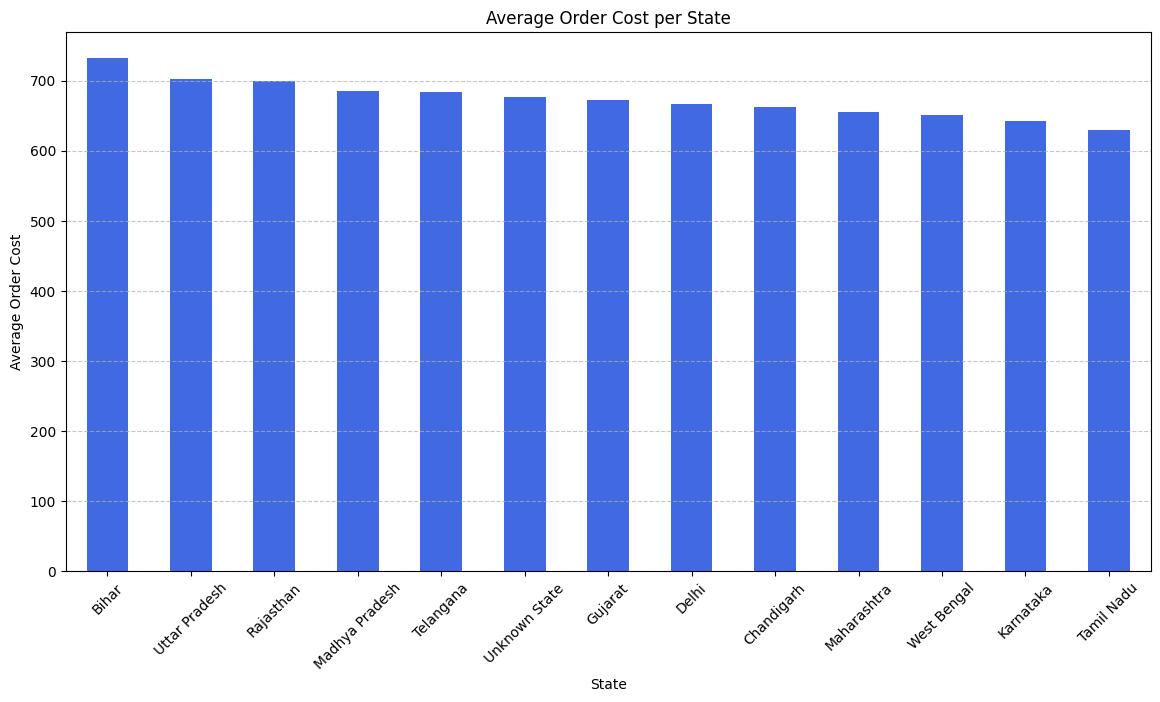

In [184]:
avg_order_cost_per_state = _new_amazon_sale_report_df1.groupby('ship-state')['Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
avg_order_cost_per_state.plot(kind='bar', color='royalblue')
plt.xlabel("State")
plt.ylabel("Average Order Cost")
plt.title("Average Order Cost per State")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


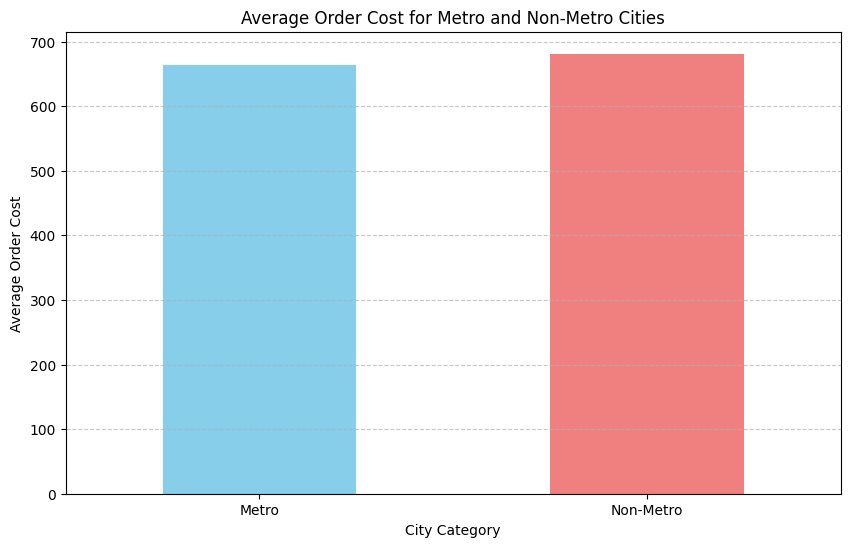

In [185]:
metro_cities = ["BENGALURU", "HYDERABAD", "MUMBAI", "NEW DELHI", "CHENNAI"]

_new_amazon_sale_report_df1['city_category'] = _new_amazon_sale_report_df1['ship-city'].apply(
    lambda x: 'Metro' if x in metro_cities else 'Non-Metro'
)

avg_order_cost_per_category = _new_amazon_sale_report_df1.groupby('city_category')['Amount'].mean()

plt.figure(figsize=(10, 6))
avg_order_cost_per_category.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel("City Category")
plt.ylabel("Average Order Cost")
plt.title("Average Order Cost for Metro and Non-Metro Cities")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Conclusion :

1) Non-Metro has higher Avg cost because of all delivary and handling cost

2) Make more warehouse to bring the prices lower since non-metro city people holds major share 

3) Pottensial Market (Non-metro): improve logistics  and profit

4) High purcahse capacity : we can introduce premium products in this market with proper marketing 

In [186]:
_new_sale_report_df

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
_new_amazon_sale_report_df1

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,city-type,city_category
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,Unknown State,400081.0,IN,False,Easy Ship,Other,Metro
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,Unknown State,560085.0,IN,False,Easy Ship,Other,Metro
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,Unknown State,410210.0,IN,True,Not Specified,Other,Non-Metro
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,Unknown State,605008.0,IN,False,Easy Ship,Other,Non-Metro
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,Unknown State,600073.0,IN,False,Not Specified,Other,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,Unknown State,500013.0,IN,False,Not Specified,Other,Metro
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,Unknown State,122004.0,IN,False,Not Specified,Other,Non-Metro
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,Unknown State,500049.0,IN,False,Not Specified,Other,Metro
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Unknown State,389350.0,IN,False,Not Specified,Other,Non-Metro


In [188]:
_new_sale_report_df.isnull().sum()



index          0
SKU Code      83
Design No.    36
Stock         36
Category      45
Size          36
Color         45
dtype: int64

In [189]:
_new_sale_report_df['SKU Code'] = _new_sale_report_df['SKU Code'].fillna(_new_sale_report_df['SKU Code'].mode()[0])
_new_sale_report_df['Design No.'] = _new_sale_report_df['Design No.'].fillna(_new_sale_report_df['Design No.'].mode()[0])
_new_sale_report_df['Stock'] = _new_sale_report_df['Stock'].fillna(_new_sale_report_df['Stock'].median())
_new_sale_report_df['Category'] = _new_sale_report_df['Category'].fillna(_new_sale_report_df['Category'].mode()[0])
_new_sale_report_df['Size'] = _new_sale_report_df['Size'].fillna(_new_sale_report_df['Size'].mode()[0])
_new_sale_report_df['Color'] = _new_sale_report_df['Color'].fillna(_new_sale_report_df['Color'].mode()[0])


In [190]:
category_sales = _new_amazon_sale_report_df1.groupby('Category')['Amount'].sum().sort_values(ascending=False)
print(category_sales)

highest_sales_category = category_sales.idxmax()
print(f"The category with the highest sales is: {highest_sales_category}")

sales_report_combined = pd.merge(_new_sale_report_df, _new_amazon_sale_report_df1, left_on='SKU Code', right_on='SKU', how='inner')

print

Category
Set              42819983.03
kurta            24798885.70
Western Dress    12091139.69
Top               5851868.30
Ethnic Dress       867177.66
Blouse             506859.18
Bottom             171172.98
Saree              133037.76
Dupatta               915.00
Name: Amount, dtype: float64
The category with the highest sales is: Set


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

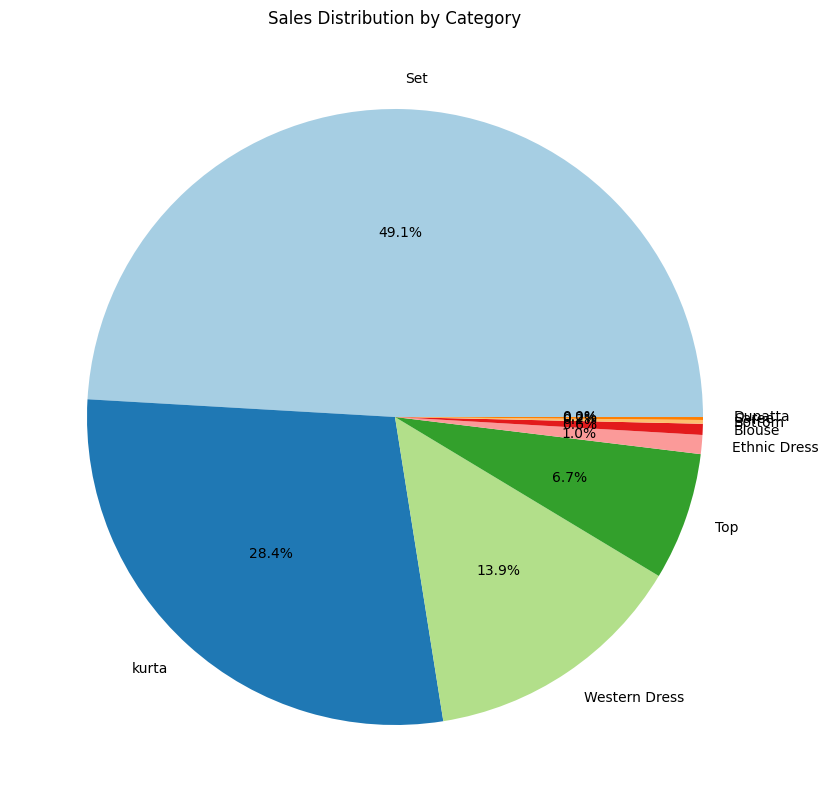

In [191]:
category_sales = _new_amazon_sale_report_df1.groupby('Category')['Amount'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 10))
category_sales.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired(range(len(category_sales))))
plt.title('Sales Distribution by Category')
plt.ylabel('')
plt.show()

In [192]:

_new_amazon_sale_report_df1['Date'] = pd.to_datetime(_new_amazon_sale_report_df1['Date'])
_new_amazon_sale_report_df1['Month'] = _new_amazon_sale_report_df1['Date'].dt.month
_new_amazon_sale_report_df1['Year'] = _new_amazon_sale_report_df1['Date'].dt.year
set_data = _new_amazon_sale_report_df1[_new_amazon_sale_report_df1['Category'] == 'Set']
kurta_data = _new_amazon_sale_report_df1[_new_amazon_sale_report_df1['Category'] == 'kurta']
western_dress_data = _new_amazon_sale_report_df1[_new_amazon_sale_report_df1['Category'] == 'Western Dress']

set_orders = set_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
kurta_orders = kurta_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)
western_dress_orders = western_dress_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

/var/folders/w0/31yxj0vn2vj3g6478zc3ly3h0000gp/T/ipykernel_49345/3853731018.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _new_amazon_sale_report_df1['Date'] = pd.to_datetime(_new_amazon_sale_report_df1['Date'])


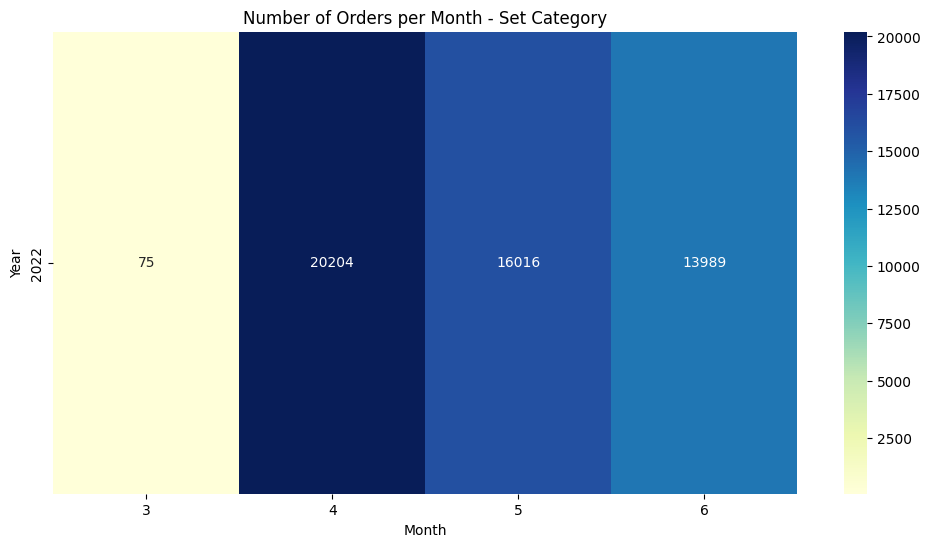

In [193]:
plt.figure(figsize=(12, 6))
sns.heatmap(set_orders, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Orders per Month - Set Category')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

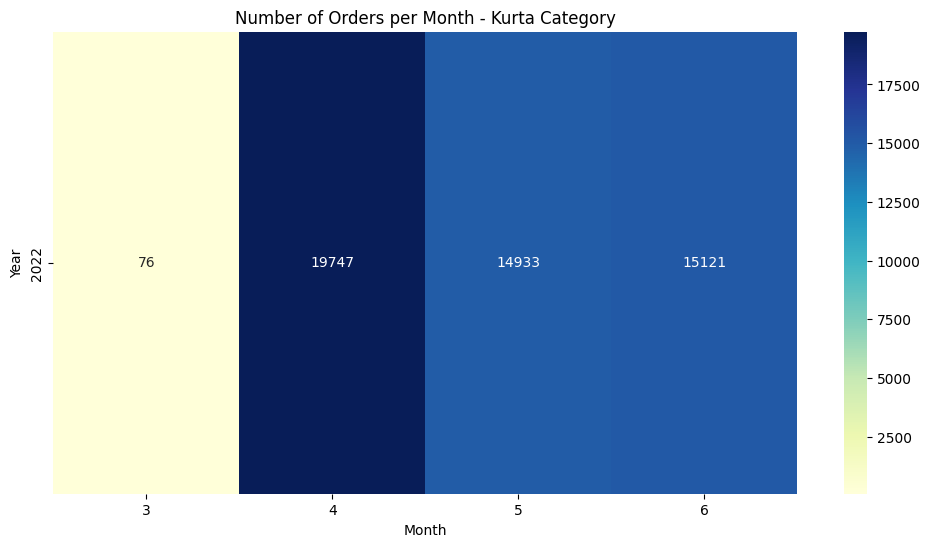

In [194]:
plt.figure(figsize=(12, 6))
sns.heatmap(kurta_orders, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Orders per Month - Kurta Category')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

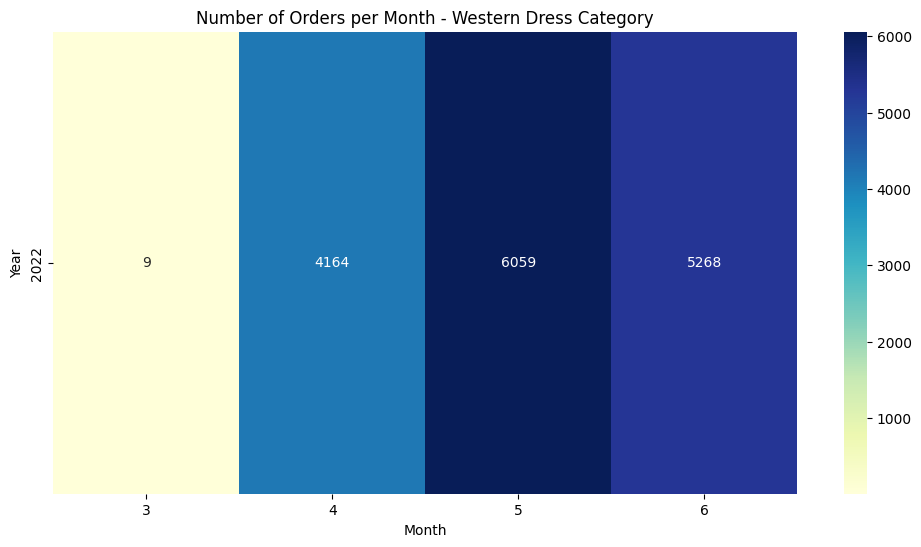

In [195]:
plt.figure(figsize=(12, 6))
sns.heatmap(western_dress_orders, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Number of Orders per Month - Western Dress Category')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

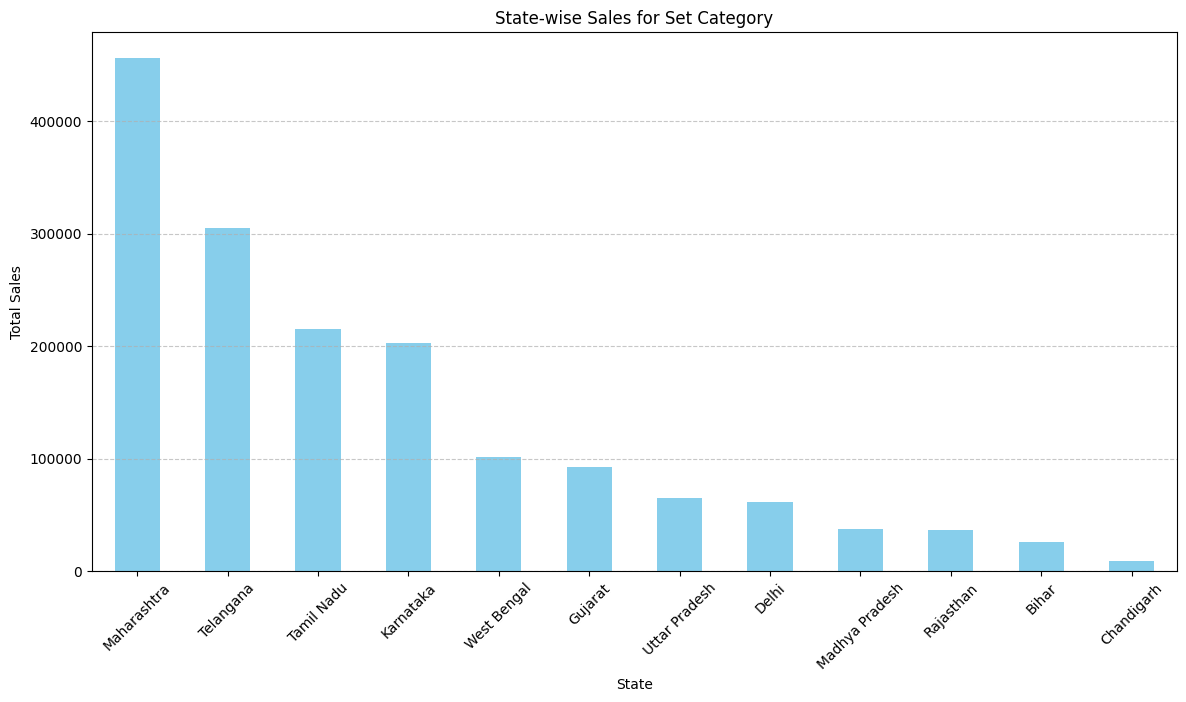

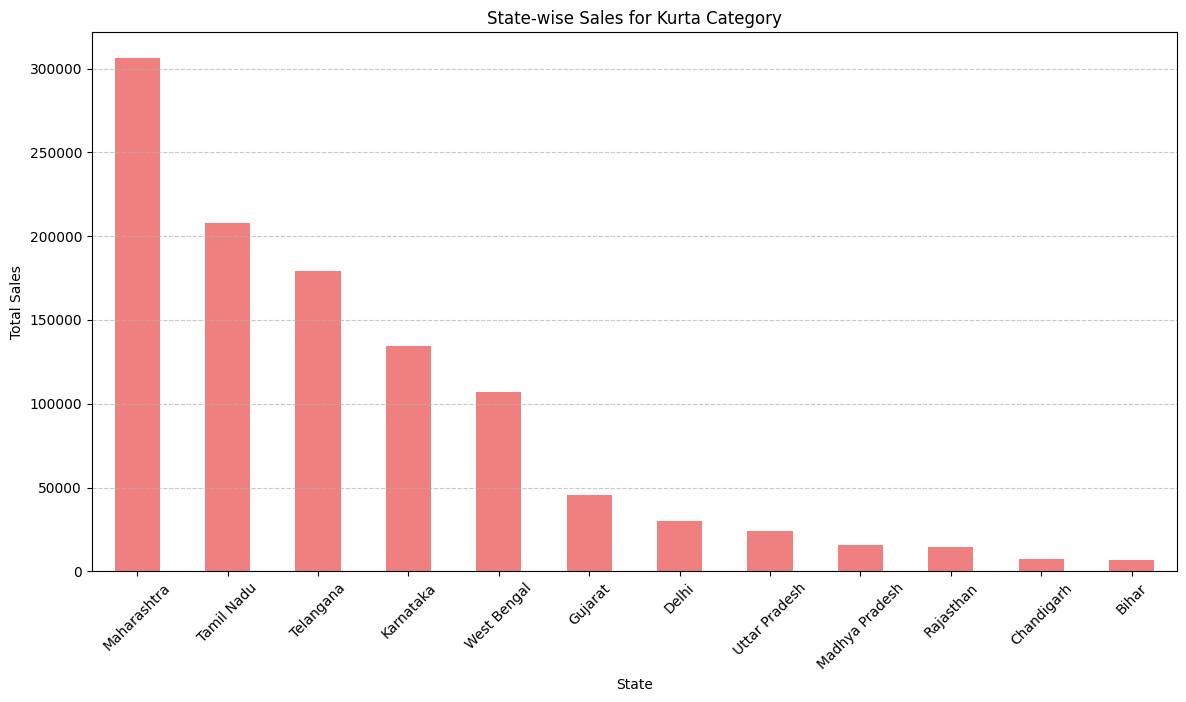

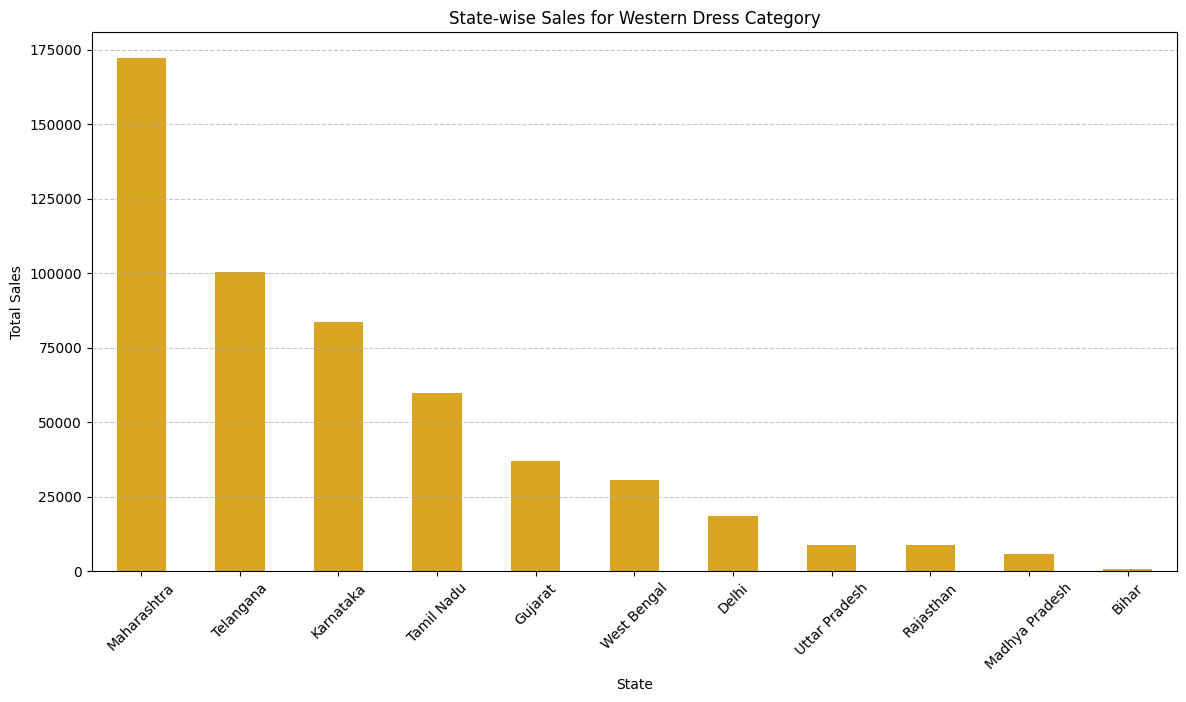

In [196]:

set_data = _new_amazon_sale_report_df1[(_new_amazon_sale_report_df1['Category'] == 'Set') & (_new_amazon_sale_report_df1['ship-state'].notnull()) & (_new_amazon_sale_report_df1['ship-state'] != 'Unknown State')]
kurta_data = _new_amazon_sale_report_df1[(_new_amazon_sale_report_df1['Category'] == 'kurta') & (_new_amazon_sale_report_df1['ship-state'].notnull()) & (_new_amazon_sale_report_df1['ship-state'] != 'Unknown State')]
western_dress_data = _new_amazon_sale_report_df1[(_new_amazon_sale_report_df1['Category'] == 'Western Dress') & (_new_amazon_sale_report_df1['ship-state'].notnull()) & (_new_amazon_sale_report_df1['ship-state'] != 'Unknown State')]

set_sales_per_state = set_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
kurta_sales_per_state = kurta_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)
western_dress_sales_per_state = western_dress_data.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
set_sales_per_state.plot(kind='bar', color='skyblue')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("State-wise Sales for Set Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 7))
kurta_sales_per_state.plot(kind='bar', color='lightcoral')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("State-wise Sales for Kurta Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 7))
western_dress_sales_per_state.plot(kind='bar', color='goldenrod')
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.title("State-wise Sales for Western Dress Category")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Set:
1) Festival and Wedding Season

2) Promotional Campaigns




Kurta:

1) Maharashtra: Gudi Padwa(Marathi new year)

2) Tamil Nadu (Puthandu and Vaikasi Visakam):

Puthandu (Tamil New Year): Celebrated in April, it's a major occasion for buying new traditional attire, including kurtas.

3) Telangana
Ugadi: Celebrated in March/April, this festival marks the Telugu New Year, a time for new clothes, including kurtas.







Business Insights :

1) Increase varoious and unique design to increase sale 

2) Increase prices : to increase profit 

3) Introduce various schemes : to attract more customer 

In [197]:
total_entries = len(_new_amazon_sale_report_df1)

shipped_count = int(total_entries * (1 / (1 + 0.65 + 0.35)))
cancelled_count = int(total_entries * (0.65 / (1 + 0.65 + 0.35)))
returned_count = total_entries - shipped_count - cancelled_count


status_values = ['Shipped'] * shipped_count + ['Cancelled'] * cancelled_count + ['Returned'] * returned_count


np.random.shuffle(status_values)

In [198]:
_new_amazon_sale_report_df1['Status'] = status_values


print(_new_amazon_sale_report_df1['Status'].value_counts())

Status
Shipped      64487
Cancelled    41916
Returned     22572
Name: count, dtype: int64


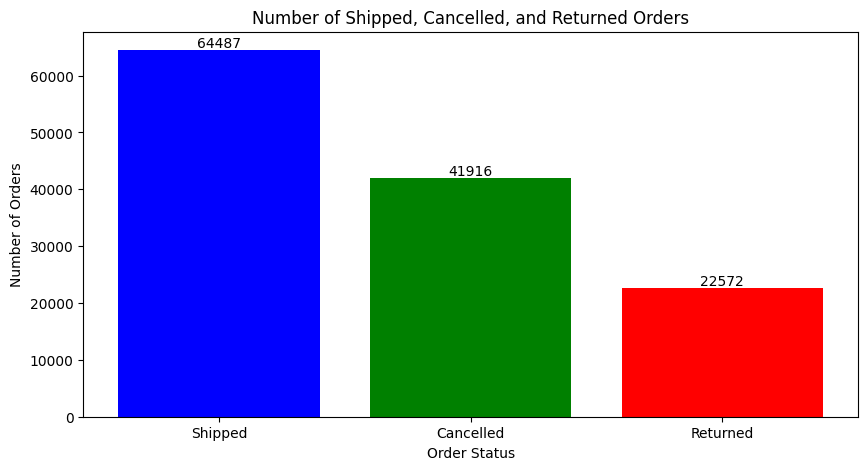

In [199]:
status_counts = _new_amazon_sale_report_df1['Status'].value_counts().reset_index()
status_counts.columns = ['Status', 'Count']

plt.figure(figsize=(10, 5))
plt.bar(status_counts['Status'], status_counts['Count'], color=['blue', 'green', 'red'])
for i, val in enumerate(status_counts['Count']):
    plt.text(i, val, f'{val}', ha='center', va='bottom')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Number of Shipped, Cancelled, and Returned Orders')
plt.show()

NUMBER OF PRODUCT RETURNED BY CUSTOMER FOR VARIOUS PRODCUT CATEGORIES  

In [200]:
aov_by_status = _new_amazon_sale_report_df1.groupby('Status')['Amount'].mean().reset_index()


aov_by_status.columns = ['Status', 'Average Order Value']

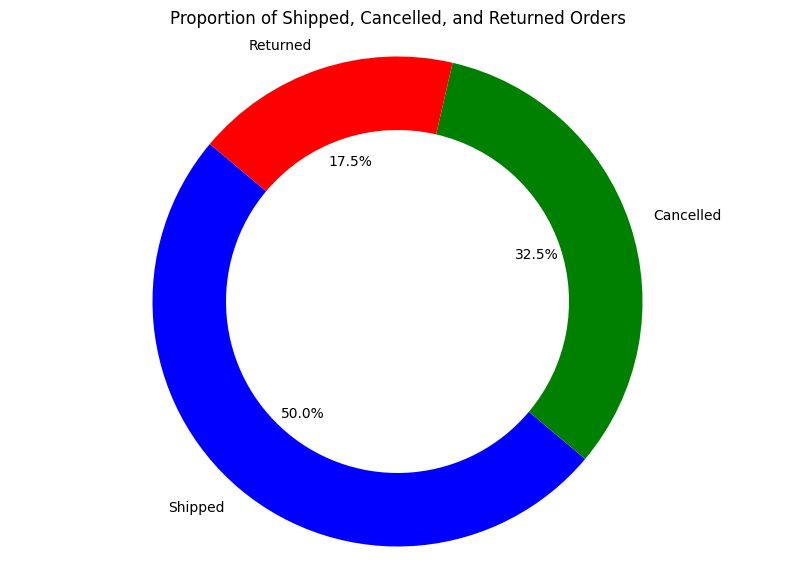

In [201]:
status_counts = _new_amazon_sale_report_df1['Status'].value_counts()


plt.figure(figsize=(10, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['blue', 'green', 'red'], startangle=140, wedgeprops=dict(width=0.3))
plt.title('Proportion of Shipped, Cancelled, and Returned Orders')
plt.axis('equal')  
plt.show()